In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [2]:
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2 = (784 X 100) Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3 = (100X10)  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)      
                        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])       
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
    def feed_forward(self):  
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )    
    
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )
   
    
    # 정확도 측정함수 
    def accuracy(self, test_input_data, test_target_data):
        
        matched_list = []
        not_matched_list = []
        
        # list which contains (index, label, prediction) value
        index_label_prediction_list = []
        
        # temp list which contains label and prediction in sequence
        temp_list = []
        
        for index in range(len(test_input_data)):
                        
            label = int(test_target_data[index])
                        
            # one-hot encoding을 위한 데이터 정규화 (data normalize)
            data = (test_input_data[index] / 255.0 * 0.99) + 0.01
                  
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            predicted_num = self.predict(np.array(data, ndmin=2)) 
        
            if label == predicted_num:
                matched_list.append(index)
                
            else:
                
                not_matched_list.append(index)
                
                # label_prediction_list
                temp_list.append(index)
                temp_list.append(label)
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []
                
                
        print("Current Accuracy = ", (len(matched_list)/(len(test_input_data))) )
        
        return matched_list, not_matched_list, index_label_prediction_list
    
    
    def train(self, input_data, target_data):   # input_data : 784 개, target_data : 10개
        
        self.target_data = target_data    
        self.input_data = input_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_3 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)   
        
        self.b3 = self.b3 - self.learning_rate * loss_3  
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)   
        
        self.b2 = self.b2 - self.learning_rate * loss_2
        
    def predict(self, input_data):        # input_data 는 행렬로 입력됨 즉, (1, 784) shape 을 가짐        
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = sigmoid(Z3)
        
        predicted_num = np.argmax(A3)
    
        return predicted_num

In [4]:
# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 training data 읽어옴
training_data = np.loadtxt('./(191110)mnist_train.csv', delimiter=',', dtype=np.float32)

print("training_data.shape = ", training_data.shape)
print("training_data[0,0] = ", training_data[0,0], ", len(training_data[0]) = ", len(training_data[0]))

training_data.shape =  (60000, 785)
training_data[0,0] =  5.0 , len(training_data[0]) =  785


#### 은닉층 노드 100 개 인 경우의 MNIST 오차역전파 (예제 1)

In [5]:
# hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 100     # hidden 1 nodes
o_nodes = 10       # output nodes
lr = 0.1           # learning rate
epochs = 1         # epochs

# 손실함수 값을 저장할 list 생성
loss_val_list = []

nn = NeuralNetwork(i_nodes, h1_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
    
    for step in range(len(training_data)):  # train
    
        # input_data, target_data normalize        
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[step, 0])] = 0.99
    
        input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01
    
        nn.train( np.array(input_data, ndmin=2), np.array(target_data, ndmin=2) )
    
        if step % 1000 == 0:
            print("epochs = ", i, ", step = ", step,  ", current loss_val = ", nn.loss_val())
        
        # 손실함수 값 저장
        loss_val_list.append(nn.loss_val())        
        
end_time = datetime.now() 
print("\nelapsed time = ", end_time - start_time) 

epochs =  0 , step =  0 , current loss_val =  6.034190682690956
epochs =  0 , step =  1000 , current loss_val =  1.6122840185048568
epochs =  0 , step =  2000 , current loss_val =  1.8369766716138305
epochs =  0 , step =  3000 , current loss_val =  2.5712000565725788
epochs =  0 , step =  4000 , current loss_val =  1.1195322862493213
epochs =  0 , step =  5000 , current loss_val =  0.8568665439772024
epochs =  0 , step =  6000 , current loss_val =  0.6437860319511591
epochs =  0 , step =  7000 , current loss_val =  2.0451890794427374
epochs =  0 , step =  8000 , current loss_val =  0.6691779740621624
epochs =  0 , step =  9000 , current loss_val =  0.9443341579071138
epochs =  0 , step =  10000 , current loss_val =  0.6497603675675286
epochs =  0 , step =  11000 , current loss_val =  0.7259766486351718
epochs =  0 , step =  12000 , current loss_val =  0.8181997753245803
epochs =  0 , step =  13000 , current loss_val =  0.9520138659975792
epochs =  0 , step =  14000 , current loss_val =

In [8]:
# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 test data 읽어옴
test_data = np.loadtxt('./(191110)mnist_test.csv', delimiter=',', dtype=np.float32)

test_input_data = test_data[ : , 1: ]
test_target_data = test_data[ : , 0 ]

print("test_data.shape = ", test_data.shape)
print("test_data[0,0] = ", test_data[0,0], ", len(test_data[0]) = ", len(test_data[0]))

# measure accuracy
(true_list, false_list, index_label_prediction_list) = nn.accuracy(test_input_data, test_target_data)   

test_data.shape =  (10000, 785)
test_data[0,0] =  7.0 , len(test_data[0]) =  785
Current Accuracy =  0.9339


In [9]:
print(false_list)

[8, 33, 111, 124, 139, 149, 193, 241, 247, 259, 290, 300, 313, 320, 321, 325, 340, 352, 358, 362, 381, 403, 444, 445, 448, 449, 468, 479, 495, 502, 511, 532, 543, 550, 551, 565, 571, 578, 582, 591, 610, 613, 624, 628, 629, 659, 667, 684, 689, 691, 707, 717, 720, 740, 741, 760, 781, 787, 791, 810, 839, 844, 881, 898, 900, 924, 939, 947, 950, 951, 956, 959, 960, 965, 975, 990, 1003, 1012, 1014, 1032, 1039, 1055, 1062, 1068, 1073, 1082, 1096, 1101, 1107, 1112, 1114, 1119, 1125, 1173, 1181, 1191, 1192, 1194, 1198, 1200, 1202, 1204, 1206, 1208, 1224, 1226, 1232, 1242, 1243, 1247, 1252, 1256, 1260, 1270, 1272, 1283, 1289, 1299, 1319, 1325, 1326, 1328, 1337, 1357, 1378, 1391, 1393, 1409, 1410, 1413, 1422, 1433, 1440, 1453, 1466, 1467, 1469, 1494, 1500, 1522, 1525, 1527, 1530, 1549, 1553, 1571, 1581, 1609, 1621, 1634, 1678, 1681, 1696, 1702, 1709, 1716, 1717, 1718, 1721, 1722, 1737, 1751, 1754, 1759, 1772, 1790, 1813, 1828, 1839, 1850, 1855, 1865, 1878, 1883, 1899, 1901, 1911, 1917, 1930, 1938

In [10]:
print(index_label_prediction_list)

[[8, 5, 6], [33, 4, 6], [111, 7, 1], [124, 7, 4], [139, 4, 9], [149, 2, 9], [193, 9, 3], [241, 9, 5], [247, 4, 6], [259, 6, 0], [290, 8, 4], [300, 4, 6], [313, 3, 5], [320, 9, 1], [321, 2, 7], [325, 4, 9], [340, 5, 3], [352, 5, 0], [358, 7, 9], [362, 2, 7], [381, 3, 7], [403, 8, 9], [444, 2, 8], [445, 6, 0], [448, 9, 8], [449, 3, 5], [468, 7, 2], [479, 9, 3], [495, 8, 2], [502, 5, 3], [511, 4, 1], [532, 4, 9], [543, 8, 3], [550, 7, 9], [551, 7, 1], [565, 4, 9], [571, 4, 9], [578, 3, 2], [582, 8, 3], [591, 8, 3], [610, 4, 6], [613, 2, 8], [624, 2, 1], [628, 3, 9], [629, 2, 6], [659, 2, 9], [667, 7, 1], [684, 7, 1], [689, 7, 9], [691, 8, 4], [707, 4, 9], [717, 0, 6], [720, 5, 8], [740, 4, 9], [741, 2, 8], [760, 4, 9], [781, 8, 3], [787, 8, 3], [791, 5, 9], [810, 7, 2], [839, 8, 3], [844, 8, 7], [881, 4, 9], [898, 7, 2], [900, 1, 3], [924, 2, 7], [939, 2, 0], [947, 8, 9], [950, 7, 2], [951, 5, 4], [956, 1, 6], [959, 4, 9], [960, 7, 1], [965, 6, 0], [975, 2, 3], [990, 2, 3], [1003, 5, 3], 

#### 오답 확인

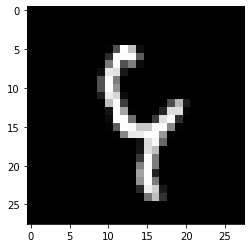

In [11]:
# check false data
import matplotlib.pyplot as plt
%matplotlib inline

img = test_data[1901, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

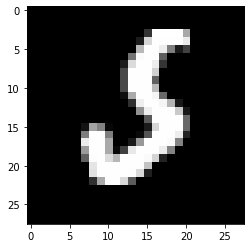

In [12]:
img = test_data[9982, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

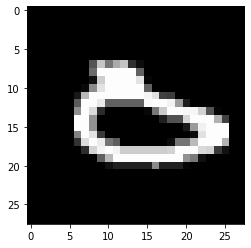

In [13]:
img = test_data[717, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

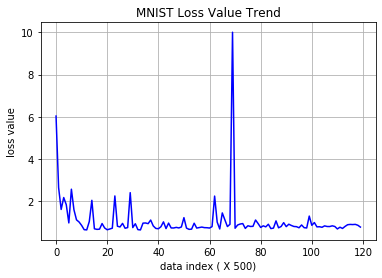

In [14]:
# 손실함수 추세 확인
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 500):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500)')
plt.ylabel('loss value')
plt.grid()
plt.plot(Y_DATA_LIST, color='b')
plt.show()

#### 최대손실값 / 최소손실값 확인 (예제 2)

In [15]:
max_loss = np.max(loss_val_list)
min_loss = np.min(loss_val_list)
max_loss_index = np.argmax(loss_val_list)
min_loss_index = np.argmin(loss_val_list)

print("max_loss = ", max_loss, ", max_loss_index = ", max_loss_index, ", min_loss = ", min_loss, ", min_loss_index = ", min_loss_index)

max_loss =  17.776644815190693 , max_loss_index =  59915 , min_loss =  0.5742615279839673 , min_loss_index =  6529


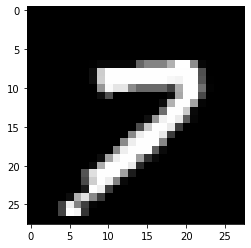

label =  4.0


In [16]:
# check max loss data
import matplotlib.pyplot as plt
%matplotlib inline

img = training_data[max_loss_index, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

print("label = ", training_data[max_loss_index, 0])

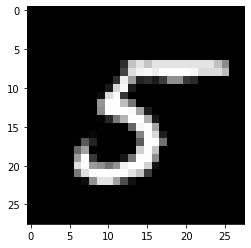

label =  5.0


In [17]:
# check min loss data
import matplotlib.pyplot as plt
%matplotlib inline

img = training_data[min_loss_index, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

print("label = ", training_data[min_loss_index, 0])